# Similaridade Partidária

## Análise dos discursos parlamentares

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Lendo a base de dados
df = pd.read_csv('discursos/2019_discursos.csv', sep=";", encoding="utf-8")
df.head()

,Data,Sessão,Fase,Discurso,Hora,Publicação,NomeOrador,Partido,Estado,TextoDiscurso
0,01/01/2019,1.2019.N,NaN,TextoHTML.asp?etapa=5 &nuSessao=1.2019.N &nuQu...,15h16,DCN 02/01/2019 PAG. 7,JAIR MESSIAS BOLSONARO,NaN,NaN,O SR. JAIR MESSIAS BOLSONARO - Exmo. Sr. Pres...
1,01/01/2019,1.2019.N,NaN,TextoHTML.asp?etapa=5 &nuSessao=1.2019.N &nuQu...,15h08,DCN 02/01/2019 PAG. 6,JAIR MESSIAS BOLSONARO,NaN,NaN,O SR. JAIR MESSIAS BOLSONARO - Prometo manter...
2,01/01/2019,1.2019.N,NaN,TextoHTML.asp?etapa=5 &nuSessao=1.2019.N &nuQu...,15h08,DCN 02/01/2019 PAG. 6,HAMILTON MARTINS MOURÃO,NaN,NaN,O SR. HAMILTON MARTINS MOURÃO - Prometo mante...
3,27/02/2019,18.2019,ENCERRAMENTO,TextoHTML.asp?etapa=5 &nuSessao=18.2019 &nuQua...,16h16,DCD28/02/2019 PAG. 139,STEFANO AGUIAR,PSD,MG,DISCURSO NA ÍNTEGRA ENCAMINHADO PELO SR. DEPU...
4,27/02/2019,18.2019,ENCERRAMENTO,TextoHTML.asp?etapa=5 &nuSessao=18.2019 &nuQua...,16h16,DCD28/02/2019 PAG. 141,OTONI DE PAULA,PSC,RJ,DISCURSO NA ÍNTEGRA ENCAMINHADO PELO SR. DEPU...


In [3]:
print("A base de dados apresenta {} registros e {} variáveis".format(df.shape[0], df.shape[1]))

A base de dados apresenta 18533 registros e 10 variáveis


In [4]:
# Contagem dos dados por atributo partido
df.groupby('Partido').count()

,Data,Sessão,Fase,Discurso,Hora,Publicação,NomeOrador,Estado,TextoDiscurso
Partido,,,,,,,,,
-,26,26,26,26,26,26,26,26,26
AVANTE,179,179,179,179,179,179,179,179,179
CIDADANIA,353,353,353,353,353,353,353,353,353
DEM,462,462,462,462,462,462,462,462,462
MDB,575,575,575,575,575,575,575,575,575
NOVO,571,571,571,571,571,571,571,571,571
PATRI,30,30,30,30,30,30,30,30,30
PATRIOTA,66,66,66,66,66,66,66,66,66
PCDOB,904,904,904,904,904,904,904,904,904


In [5]:
# Removendo discursos de pessoas não ligadas a partidos. 
# Geralmente estas pessoas têm poucos discursos
df = df.groupby('Partido').filter(lambda x : len(x)>5)

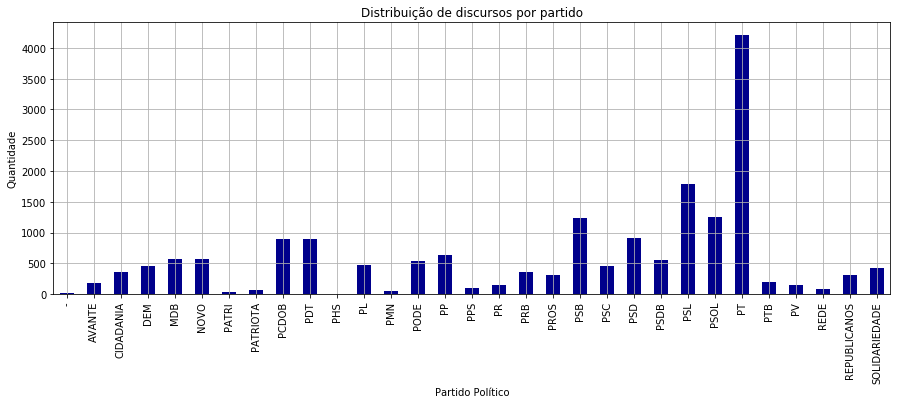

In [6]:
disc_por_partido = df.groupby('Partido').count().Discurso
disc_por_partido.plot(kind='bar', figsize=(15,5), grid=True, rot=90, color='darkblue')

plt.title('Distribuição de discursos por partido')
plt.xlabel('Partido Político')
plt.ylabel('Quantidade')
plt.show()

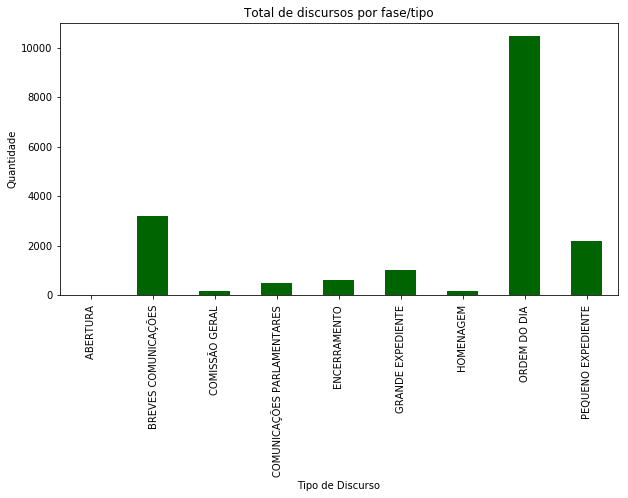

In [7]:
fase = df.groupby('Fase').count().Discurso
fase.plot(kind='bar', figsize=(10,5), grid=False, rot=90, color='darkgreen')

plt.title('Total de discursos por fase/tipo')
plt.xlabel('Tipo de Discurso')
plt.ylabel('Quantidade')
plt.show()

## Pré-processamento

Dentre as etapas de aplicação de técnicas de Inteligência Artificial, o pré-processamento é uma das mais importantes para se obter um bom resultado. Esta é uma etapa fundamental que precede a realização de análises e aplicação de algoritmos de aprendizagem de máquinas.

<p>Conforme Art. 65 do Regimento Interno da Câmara dos Deputados, as sessões realizadas em Plenário são classificadas como: <br />
I - preparatórias;<br />
II - deliberativas;<br />
III - não deliberativas.</p>

Para a presente pesquisa, serão utilizados os discursos das sessões deliberativas sendo estes: <br />
I - Pequeno Expediente, com duração de sessenta minutos improrrogáveis, destinado à matéria do expediente e aos oradores inscritos que tenham comunicação a fazer;<br />
II - Grande Expediente, a iniciar-se às dez ou às quinze horas, conforme o caso, com duração improrrogável de cinquenta minutos, distribuída entre os oradores inscritos; <br />
III – Ordem do Dia, a iniciar-se às dezesseis horas, com duração de três horas prorrogáveis, para apreciação da pauta; <br />
IV - Comunicações Parlamentares, desde que haja tempo, destinadas a representantes de Partidos e Blocos Parlamentares, alternadamente, indicados pelos Líderes.

In [8]:
# Removendo as fases ABERTURA, BREVES COMUNICAÇÕES, ORDEM DO DIA, HOMENAGEM e ENCERRAMENTO
df = df.query("Fase in ['ORDEM DO DIA ','COMUNICAÇÕES PARLAMENTARES ','GRANDE EXPEDIENTE ','PEQUENO EXPEDIENTE ']")
df.shape

(14161, 10)

In [9]:
# Removendo valores nulos
a = df.shape[0]
df = df.dropna()
b = df.shape[0]
print ("Removidas", (a - b), "linhas")

Removidas 0 linhas


In [10]:
# Removendo valores duplicados
a = df.shape[0]
df = df.drop_duplicates(['Discurso'])
b = df.shape[0]
print ("Removidas", (a - b), "linhas")

Removidas 0 linhas


In [11]:
# Removendo discursos de não parlamentares devido a não haver conexão com partidos 
df = df.query('Partido != "-" & Partido != "S.PART." & Partido!= "SEM PARTIDO"')
print("A base de dados apresenta {} registros e {} variáveis".format(df.shape[0], df.shape[1]))

A base de dados apresenta 14158 registros e 10 variáveis


Diante da crise política de 2014, vários partidos mudaram de nome, símbolo e ideologia, tanto para atrair eleitores para as eleições de 2018, como também para se esquivar dos casos de corrupção envolvendo políticos desses partidos. Os nomes foram alterados, em muitos casos, para slogans, em vez de siglas. Também caiu a palavra "partido" em alguns casos de renomeação.

In [12]:
# Ajustando siglas de partidos
df['Partido'] = df['Partido'].replace(['PTN', 'PODEMOS'], 'PODE')
df['Partido'] = df['Partido'].replace(['PTDOB'], 'AVANTE')
df['Partido'] = df['Partido'].replace(['PEN', 'PATRIOTA'], 'PATRI')
df['Partido'] = df['Partido'].replace(['PMDB'], 'MDB')
df['Partido'] = df['Partido'].replace(['PSDC'], 'DC')
df['Partido'] = df['Partido'].replace(['PR'], 'PL')
df['Partido'] = df['Partido'].replace(['PBR'], 'REPUBLICANOS')
df['Partido'] = df['Partido'].replace(['PPS'], 'CIDADANIA')
df['Partido'] = df['Partido'].replace(['SOLIDARIEDAD'], 'SOLIDARIEDADE')

In [13]:
df.groupby('Partido').count()

,Data,Sessão,Fase,Discurso,Hora,Publicação,NomeOrador,Estado,TextoDiscurso
Partido,,,,,,,,,
AVANTE,143,143,143,143,143,143,143,143,143
CIDADANIA,395,395,395,395,395,395,395,395,395
DEM,367,367,367,367,367,367,367,367,367
MDB,394,394,394,394,394,394,394,394,394
NOVO,517,517,517,517,517,517,517,517,517
PATRI,91,91,91,91,91,91,91,91,91
PCDOB,793,793,793,793,793,793,793,793,793
PDT,693,693,693,693,693,693,693,693,693
PHS,5,5,5,5,5,5,5,5,5


<h4>Normalização</h4>
<p>
Para a normalização do corpus, foram utilizadas as seguintes técnicas: <br />
• reescrita do texto adotando apenas letras minúsculas ou maiúsculas. Nesta pesquisa optou-se pela escrita com letras minúsculas;<br />
• remoção de números;<br />
• remoção de acentuação;<br />
• remoção de caracteres especiais;<br />
• remoção de pontuação;
</p>

In [14]:
import nltk 
from nltk import tokenize
from unidecode import unidecode
from unicodedata import normalize
import unicodedata
import re
from nltk.stem import RSLPStemmer

In [15]:
# Converte texto para minúsculo e remove números e caracteres especiais
def converteMinusculo(corpus):
    #converte todas as letras para minúsculo 
    corpus = corpus.apply(lambda x: x.lower())
    #remove números e caracteres especiais 
    corpus = corpus.apply(lambda x: re.sub('[0-9]|_|\"|%|;|!|\?|,|\.|/|$|\(|\)|-|\+|:|•', ' ', x))
    return corpus

In [16]:
# Removendo acentuação
def removeAcentos(corpus):
    corpus = corpus.apply(lambda x: unidecode(x))
    return corpus


<h4>Stop words</h4>
<p>
Stop words (ou palavras de parada – tradução livre) são palavras que podem ser consideradas irrelevantes para o conjunto de resultados a ser exibido em uma busca realizada em uma search engine.<br />
Esse processo faz parte do pré-processamento de dados realizado nas etapas iniciais de um pipeline de PLN. Quando devemos montar um Bag-of-words, por exemplo, a maior frequência de palavras serão stopwords. Pois estas palavras são utilizadas o tempo todo para dar sentido ao texto. Portanto, remover stopwords reduz o ruído dos dados analisados.
</p>

In [17]:
# Removendo StopWords
def stopWords(descricao):

    token_espaco = tokenize.WhitespaceTokenizer()
    palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")
    # Retirar também os partidos
    palavras_irrelevantes2 = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','x','y','w','z']
    # como foi retirado os acentos da base, também é necessário retirar das StopWords
    palavras_irrelevantes = [unidecode(texto) for texto in palavras_irrelevantes]

    frase_processada = []
    for word in descricao:
        nova_frase = []
        palavras_texto = token_espaco.tokenize(word)
        for palavra in palavras_texto:
            if palavra not in palavras_irrelevantes:
                if palavra not in palavras_irrelevantes2:
                    nova_frase.append(palavra)
        frase_processada.append(' '.join(nova_frase))
    return frase_processada


In [18]:
# função que lê arquivo csv e retorna uma lista
import csv
def get_csv(filename):
    with open(filename) as stream:
        reader = csv.reader(stream)
        palavras = []
        for row in reader:
            palavras.append(' '.join(row))
    return list(palavras)


In [19]:
# Coletando nomes dos deputados e partidos para serem utilizados como stopwords
from keras.preprocessing.text import Tokenizer
def tokenNomes(data):
    data = removeAcentos(data)
    data = stopWords(data)
    
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(data)
    token = list(tokenizer.word_index.keys())
    return token

df_deputados = pd.read_excel('dados/deputados.xlsx')

deputados = pd.DataFrame()
deputados['deputado'] = tokenNomes(df_deputados['nomeCivil'])

deputados.to_csv('dados/stopwords_deputados.csv', index=False)

from pandasql import sqldf
q="""SELECT DISTINCT LOWER(Partido) as partido FROM df;"""
pysqldf = lambda q: sqldf(q, globals())
partidos_sw = pysqldf(q)
partidos_sw.to_csv('dados/stopwords_partidos.csv', index=False)

Using TensorFlow backend.


Nesta etapa, foram removidos dos discursos os nomes dos parlamentares e partidos para não enviesar a análise.

In [20]:
# Retira palavras desnecessárias
def retiraPalavras(descricao):
    token_espaco = tokenize.WhitespaceTokenizer()

    partidos = get_csv('dados/stopwords_partidos.csv')
    parlamentares = get_csv('dados/stopwords_deputados.csv')

    frase_processada = []
    for word in descricao:
        nova_frase = []
        palavras_texto = token_espaco.tokenize(word)
        for palavra in palavras_texto:
            if palavra not in partidos:
                if palavra not in parlamentares:
                    nova_frase.append(palavra)
        frase_processada.append(' '.join(nova_frase))
    return frase_processada

<h4>Stemmer </h4>
<p>
O processo de stemização (do inglês, stemming) consiste em reduzir uma palavra ao seu radical. <br />
Este é um recurso já conhecido na área da linguística que foi aplicado para ajudar no processamento de dados. <br />
Observe o exemplo:<br />
Falando, falar, falamos, falais, falam, falei, falarão <br />
Todos estas palavras podem ser reduzidas ao radical fala;
</p>

In [21]:
# Tratando com Stemmer
def retornaStemmer(descricao):

    token_espaco = tokenize.WhitespaceTokenizer()
    stemmer = RSLPStemmer()

    frase_processada = []
    for word in descricao:
        nova_frase = []
        palavras_texto = token_espaco.tokenize(word)
        for palavra in palavras_texto:
            nova_frase.append(stemmer.stem(palavra.lower()))
        frase_processada.append(' '.join(nova_frase))
    return frase_processada

In [22]:
# Reescrevendo em minúsculo e removendo números e caracteres especiais
df["TextoDiscurso"] = converteMinusculo(df["TextoDiscurso"])
print("Convertido texto para minúsculo")
print("Removido caracteres especiais")

# Convertendo os termos de plural para singular
#df["TextoDiscurso"] = transfSingular(df["TextoDiscurso"])
#print("Convertidos os termos em plural para singular")

# Removendo acentuação
df['TextoDiscurso'] = removeAcentos(df['TextoDiscurso'])
print("Removido acentuação")

# Removendo StopWorlds
df["TextoDiscurso"] = stopWords(df['TextoDiscurso'])
print("Removido stopwords")

# Removendo palavras desnecessárias
df["TextoDiscurso"] = retiraPalavras(df['TextoDiscurso'])
print("Removidas stopwords adicionais")


Convertido texto para minúsculo
Removido caracteres especiais
Removido acentuação
Removido stopwords
Removidas stopwords adicionais


<h4>Nuvem de Palavras</h4>
<p>
Uma <b>nuvem de palavras</b> mostra as palavras mais comuns e importantes de um texto. <br />O tamanho e estilo de cada palavra é influênciada pela quantidade de ocorrências no texto. <br />A nuvem de palavras é uma importante forma de visualização de dados textuais que auxilia na identificação de termos mais relevantes da pesquisa.
</p>

In [23]:
#!pip install wordcloud
%matplotlib inline
from wordcloud import WordCloud

import matplotlib.pyplot as plt

def nuvemPalavras(df):
    todas_palavras = ' '.join([texto for texto in df.TextoDiscurso])
    nuvem_palvras = WordCloud(width= 800, height= 500,
                              max_font_size = 100,
                              background_color='white',
                              colormap='plasma',
                              collocations = False).generate(todas_palavras)

    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palvras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

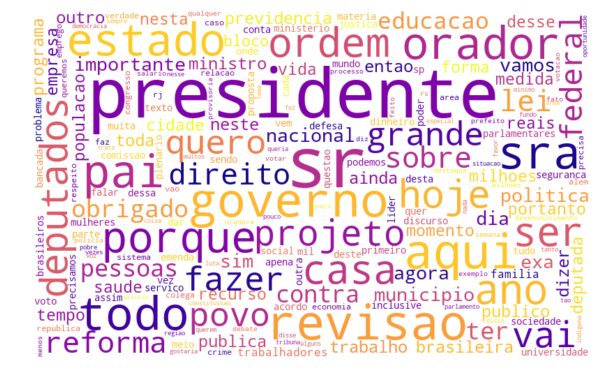

In [24]:
# Plotando Núvem de Palavras após pré-processamento
nuvemPalavras(df)

In [25]:
from pandasql import sqldf
def getQuery(q):
    sqldf_words = lambda q: sqldf(q, globals())
    return sqldf_words(q)

In [26]:
# Verificando a possibilidade de permanência de discursos sem valores
a = df.shape[0]
df = df.query("TextoDiscurso != ''")
b = df.shape[0]
print ("Removidas", (a - b), "linhas")

Removidas 90 linhas


In [27]:
#df.to_csv('discursos/preprocessados/pequeno_expediente_2010_pre_processado.csv', sep=';', index=False)

In [28]:
# Removendo Steemer
df["TextoDiscurso"] = retornaStemmer(df['TextoDiscurso'])
df.head()

,Data,Sessão,Fase,Discurso,Hora,Publicação,NomeOrador,Partido,Estado,TextoDiscurso
10,27/02/2019,18.2019,ORDEM DO DIA,TextoHTML.asp?etapa=5 &nuSessao=18.2019 &nuQua...,16h12,DCD28/02/2019 PAG. 132,CAMILO CAPIBERIBE,PSB,AP,sr ap ord revisa orad sr presid indic violenc ...
11,27/02/2019,18.2019,ORDEM DO DIA,TextoHTML.asp?etapa=5 &nuSessao=18.2019 &nuQua...,16h08,DCD28/02/2019 PAG. 132,JOSÉ RICARDO,PT,AM,sr am ord revisa orad sr presid quer paraben i...
12,27/02/2019,18.2019,ORDEM DO DIA,TextoHTML.asp?etapa=5 &nuSessao=18.2019 &nuQua...,16h08,DCD28/02/2019 PAG. 131,DARCI DE MATOS,PSD,SC,sr bloc sc ord revisa orad sr presid nest temp...
13,27/02/2019,18.2019,ORDEM DO DIA,TextoHTML.asp?etapa=5 &nuSessao=18.2019 &nuQua...,16h04,DCD28/02/2019 PAG. 130,UBIRATAN SANDERSON,PSL,RS,sr bloc rs ord revisa orad sr presid quer faz ...
14,27/02/2019,18.2019,ORDEM DO DIA,TextoHTML.asp?etapa=5 &nuSessao=18.2019 &nuQua...,16h04,DCD28/02/2019 PAG. 130,MARCELO RAMOS,PL,AM,sr bloc pr am ord revisa orad sr presid sra de...


In [29]:
# Verificando a possibilidade de permanência de discursos sem valores
a = df.shape[0]
df = df.query("TextoDiscurso != ''")
b = df.shape[0]
print ("Removidas", (a - b), "linhas")

Removidas 0 linhas


In [30]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans, MeanShift, DBSCAN, estimate_bandwidth
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### TF-IDF term frequency–inverse document frequency

In [31]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000
)
tfidf.fit(df['TextoDiscurso'])
text = tfidf.transform(df['TextoDiscurso'])

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['TextoDiscurso'])
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(),columns=tfidf_vectorizer.get_feature_names())
df_tfidf['Partido'] = df['Partido'].tolist()
df_tfidf = df_tfidf.reindex(['Partido'] + list(df_tfidf.columns[:-1]), axis=1)
df_tfidf.head()

,Partido,aa,aaapv,aacd,aafep,aaih,aatr,ab,aba,abac,...,zordan,zouain,zoz,zpe,zr,zuckerberg,zum,zumb,zuzu,zygmunt
0,PSB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,PT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,PSD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,PSL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,PL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Similaridade por Clusterização
### Medição através de clusterização com K-Means

O k-means é o mais popular e mais simples algoritmo particional. K-means foi descoberto independentemente em diferentes campos científicos, primeiramente por STEINHAUS (1956), LLOYD (1982), BALL & HALL (1965) e MACQUEEN (1967) e mesmo tendo sido proposto há mais de 50 anos, ainda é um dos algoritmos mais utilizados para clusterização devido à facilidade de implementação, simplicidade, eficiência e sucesso empírico e possui várias extensões desenvolvidas em várias formas

### Melhorando a aplicação do algoritmo K-Means

O <b>método cotovelo</b> ajuda a encontrar o melhor valor de k. Ele usa a soma das distâncias quadradas [SSE] entre os pontos de dados e seus respectivos centróides ou médias de cluster atribuídos. Em seguida, selecione o valor k na posição em que o SSE começa a achatar e formar um cotovelo.

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


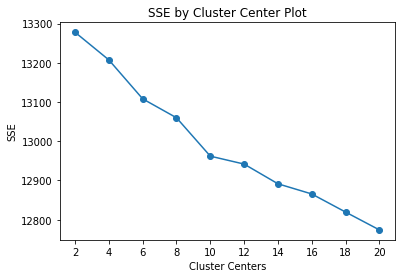

In [33]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 20)

In [34]:
clusters = MiniBatchKMeans(n_clusters=10, init_size=1024, batch_size=2048, random_state=12).fit_predict(text)

In [35]:
agrupador_kmeans = KMeans(n_clusters = 10)
labels_kmeans = agrupador_kmeans.fit_predict(text)

print("O coeficiente de silhueta do K-means é: ", silhouette_score(text, labels_kmeans))
print("Labels Kmeans: ", labels_kmeans)

O coeficiente de silhueta do K-means é:  0.005651796920384418
Labels Kmeans:  [3 3 0 ... 1 3 1]


In [36]:
labels = labels_kmeans

clusters = pd.crosstab(df["Partido"], labels)
# removendo partidos com apenas 1 discurso
clusters = clusters[clusters.sum(axis=1) > 1]
print(clusters.shape)
clusters

(27, 10)


col_0,0,1,2,3,4,5,6,7,8,9
Partido,,,,,,,,,,
AVANTE,57,18,6,14,12,2,1,21,5,7
CIDADANIA,91,15,21,56,16,6,7,151,17,12
DEM,68,35,33,49,14,18,4,114,11,17
MDB,105,77,19,63,15,6,3,72,14,18
NOVO,109,9,51,73,6,1,3,216,15,32
PATRI,33,8,4,0,2,1,1,33,7,2
PCDOB,214,33,62,98,22,14,58,187,40,60
PDT,225,59,38,68,33,6,51,124,34,52
PHS,2,0,0,3,0,0,0,0,0,0


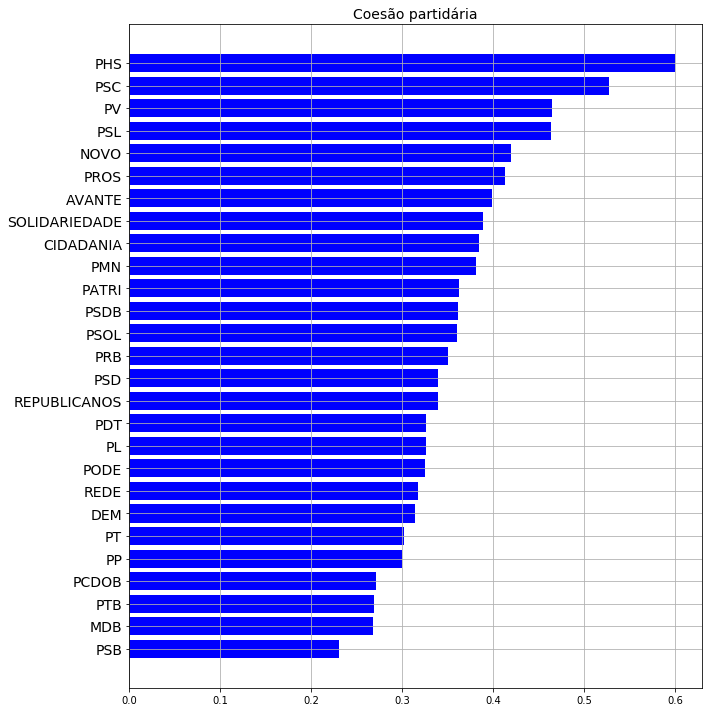

In [37]:
def coesao(clusters):
    return np.max(clusters)/np.sum(clusters)

coesao_partidos = clusters.apply(lambda x: coesao(x), axis=1).sort_values(ascending=True)

# plot coesao
fig = plt.figure(figsize=(10,10))
plt.title("Coesão partidária", fontsize=14)
y_range = [i for i in range(len(coesao_partidos))]
plt.barh(y_range, coesao_partidos,
         color="b", align="center")
plt.yticks(y_range,
           coesao_partidos.index, fontsize=14)
plt.grid()
plt.tight_layout()

In [38]:
coesao_partidos

Partido
PSB              0.230533
MDB              0.267857
PTB              0.268657
PCDOB            0.271574
PP               0.300226
PT               0.302537
DEM              0.314050
REDE             0.317647
PODE             0.325000
PL               0.325926
PDT              0.326087
REPUBLICANOS     0.339130
PSD              0.339367
PRB              0.350211
PSOL             0.360612
PSDB             0.361045
PATRI            0.362637
PMN              0.380952
CIDADANIA        0.385204
SOLIDARIEDADE    0.389503
AVANTE           0.398601
PROS             0.413502
NOVO             0.419417
PSL              0.463758
PV               0.464567
PSC              0.528125
PHS              0.600000
dtype: float64

In [39]:
df_coesao = pd.DataFrame(coesao_partidos)
df_coesao.reset_index(level=0, inplace=True)
df_coesao.columns = ['Partido', 'Score']
ano = []
for i in df_coesao['Partido']:
    ano.append("2019")
df_coesao['Ano'] = ano
df_coesao = df_coesao[['Ano', 'Partido', 'Score']]
df_coesao

,Ano,Partido,Score
0,2019,PSB,0.230533
1,2019,MDB,0.267857
2,2019,PTB,0.268657
3,2019,PCDOB,0.271574
4,2019,PP,0.300226
5,2019,PT,0.302537
6,2019,DEM,0.314050
7,2019,REDE,0.317647
8,2019,PODE,0.325000
9,2019,PL,0.325926


In [40]:
#df_coesao.to_csv('score - grande expediente/score_ge_2019v2.csv', sep=';', index=False)

#### Calculando matriz de distâncias entre vetores
Cada linha da base de discursos corresponde a um vetor. 
Nesta análise foi utilizado métricas de distância entre vetores para montar uma matriz de distâncias. <br />
Para isto, foi utilizada a biblioteca ```scipy``` oferece [diversas opções para o cálculo de distância entre vetores](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html).
<img src="https://d3i71xaburhd42.cloudfront.net/d203f5734f5ee9d49c0adff31805ed93034ca60e/3-Figure1-1.png" width="150" heigh="150">

In [41]:
import scipy.spatial.distance
df_bow = df_tfidf

def pairwise_distances(data, metric='dice'):
    dists = scipy.spatial.distance.pdist(data, metric)
    return scipy.spatial.distance.squareform(dists)

features = df_bow.columns.drop(['Partido']).tolist()
df_bow.sort_values(['Partido'], inplace=True)
dists = pairwise_distances(df_bow[features].values)

print(dists.shape)
dists

(14068, 14068)


array([[0.        , 0.76530612, 0.94858612, ..., 0.8185118 , 0.91348601,
        0.80600462],
       [0.76530612, 0.        , 0.88349515, ..., 0.9245283 , 0.90654206,
        0.9047619 ],
       [0.94858612, 0.88349515, 0.        , ..., 0.90839695, 0.88461538,
        0.88888889],
       ...,
       [0.8185118 , 0.9245283 , 0.90839695, ..., 0.        , 0.86466165,
        0.83006536],
       [0.91348601, 0.90654206, 0.88461538, ..., 0.86466165, 0.        ,
        0.82432432],
       [0.80600462, 0.9047619 , 0.88888889, ..., 0.83006536, 0.82432432,
        0.        ]])

In [42]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def plot_distances(distances, labels, ticklabels=True):
    
    sns.set(style="white")

    # Generate a large random dataset
    rs = np.random.RandomState(33)
    dists_df = pd.DataFrame(data=distances, columns=labels, index=labels)

    # Generate a mask for the upper triangle
    mask = np.zeros_like(dists_df, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(15, 10))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(dists_df, mask=mask, cmap=cmap, #vmax=.3,
                square=True, xticklabels=ticklabels, yticklabels=ticklabels,
                cbar_kws={"shrink": .5}, ax=ax)

df_bow.sort_values(['Partido'], inplace=True)
dists = pairwise_distances(df_bow[features].values)
#plot_distances(dists, df_bow.Partido, ticklabels=20)

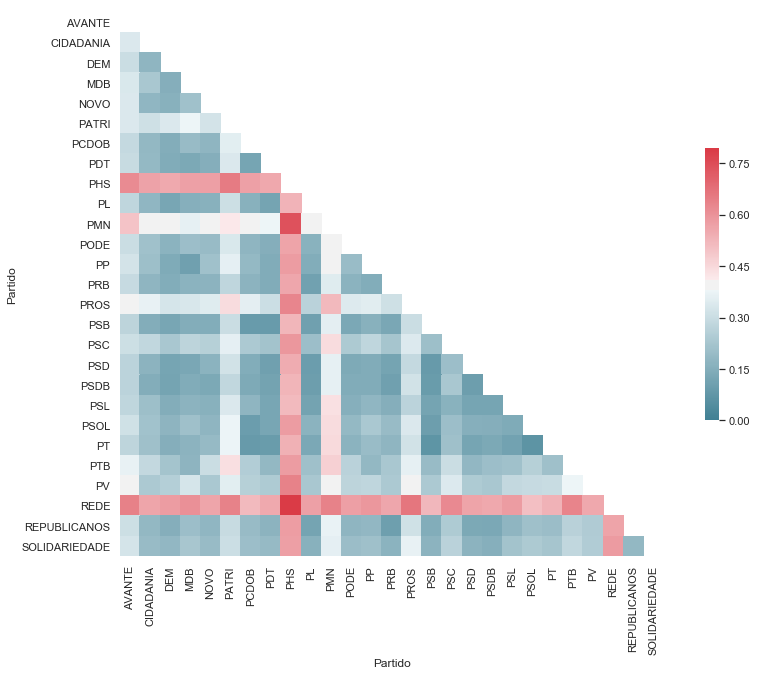

In [43]:
bow_partido = df_bow.groupby('Partido').mean()
dists = pairwise_distances(bow_partido.values, metric='cosine')
plot_distances(dists, bow_partido.index)